# Electric_Power_Consumption

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df_raw=pd.read_csv('powerconsumption.csv')

In [3]:
df= df_raw.copy()

In [4]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Data Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [8]:
df['DayoftheYear']=df['Datetime'].dt.dayofyear

In [9]:
df.drop('Datetime',axis=1,inplace=True)

In [10]:
df.tail()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,DayoftheYear
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,364
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,364
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,364
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,364
52415,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,364


In [11]:
df.isna().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
DayoftheYear              0
dtype: int64

In [12]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'DayoftheYear'],
      dtype='object')

In [13]:
df=df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'DayoftheYear', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3']]

In [14]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,DayoftheYear,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,6.559,73.8,0.083,0.051,0.119,1,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,1,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,1,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,1,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,1,27335.69620,17872.34043,18442.40964


## EDA

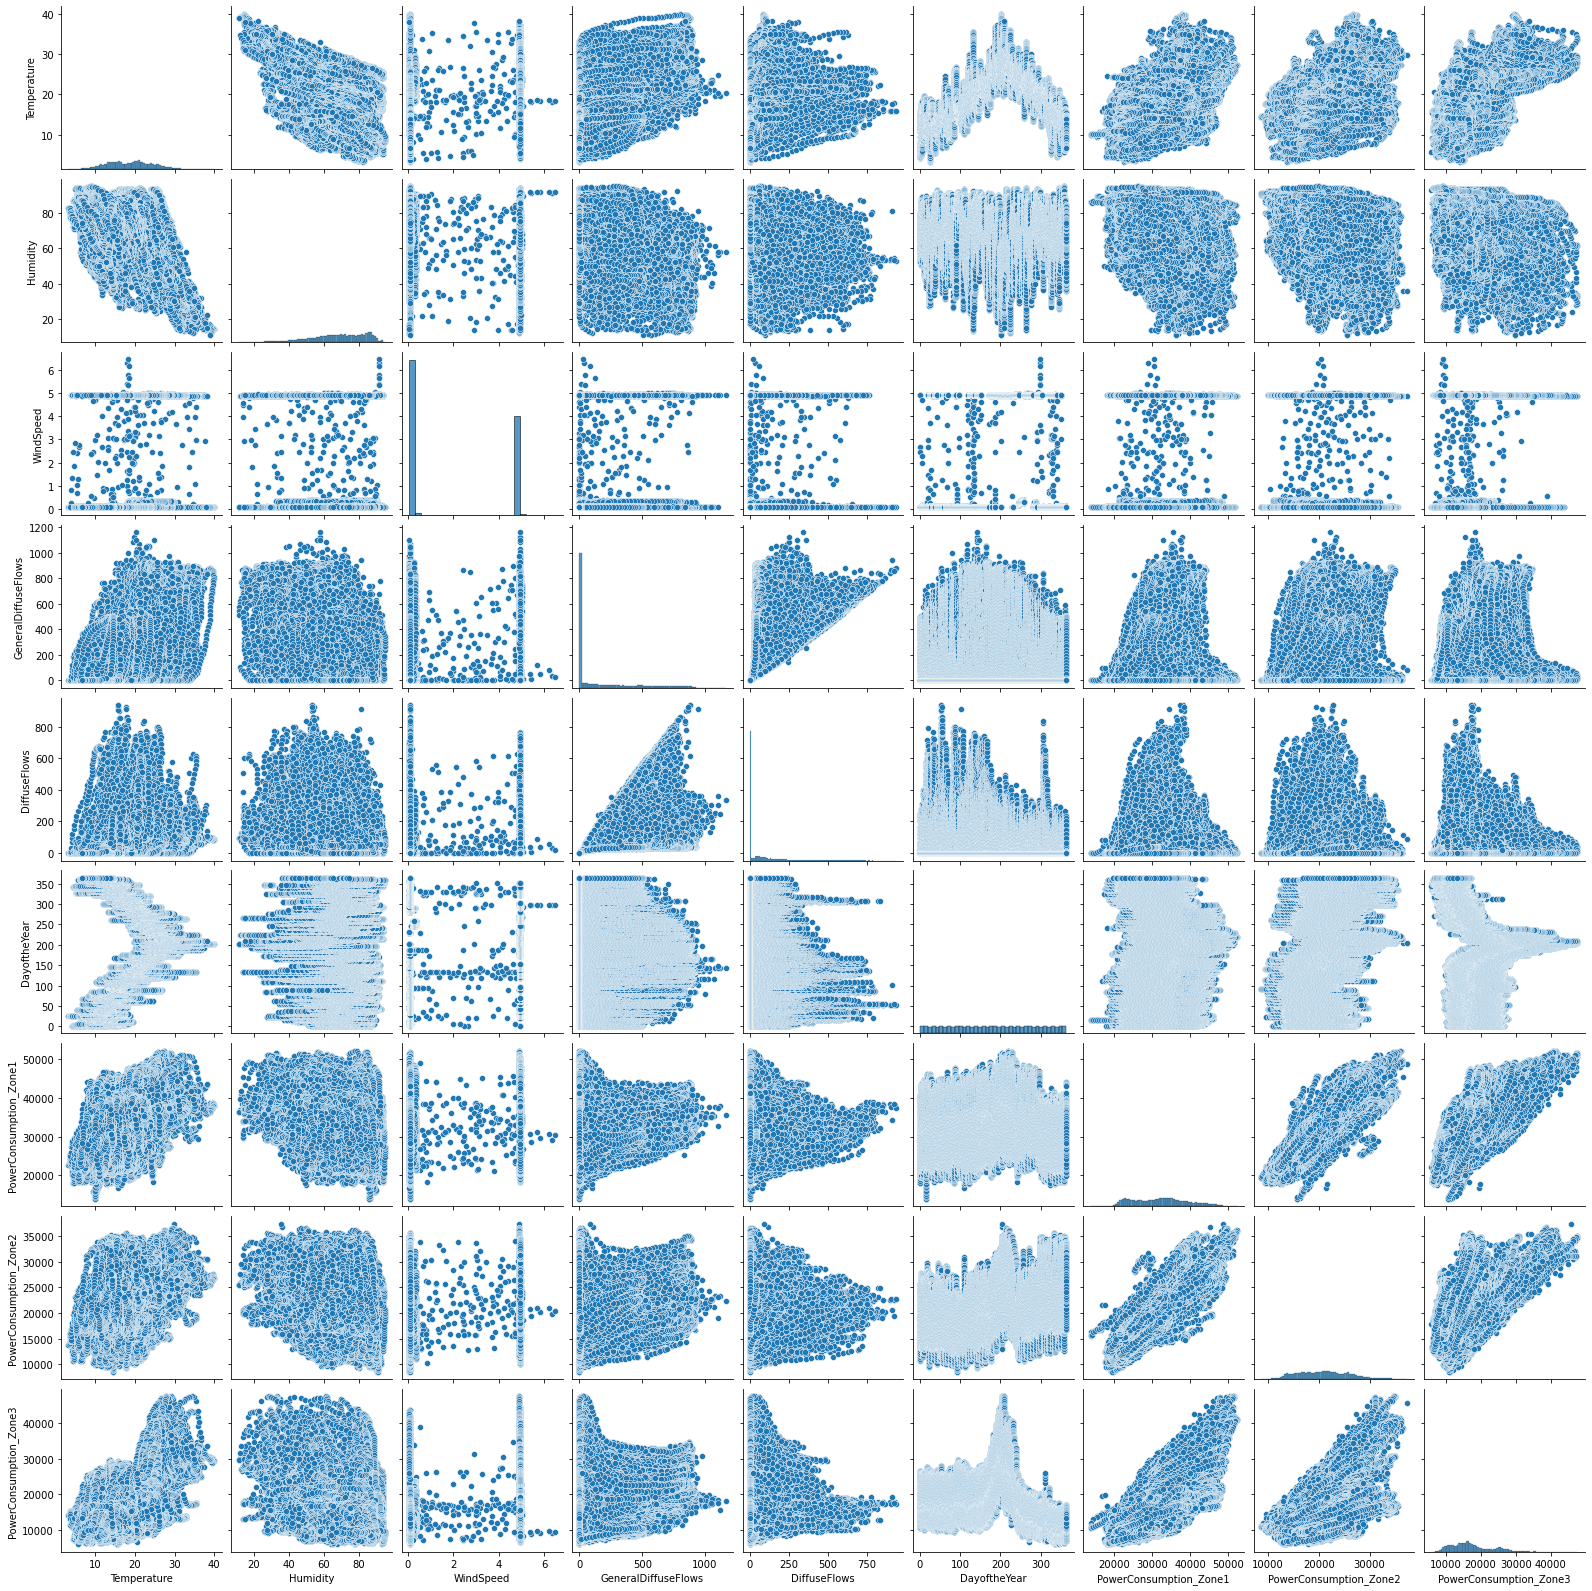

In [15]:
sns.pairplot(df)

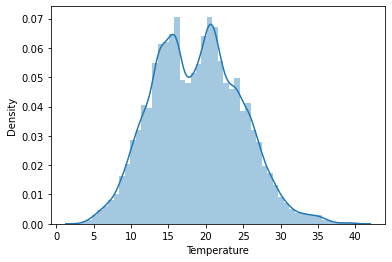

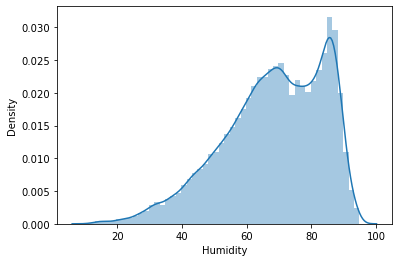

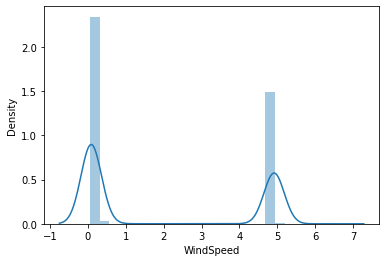

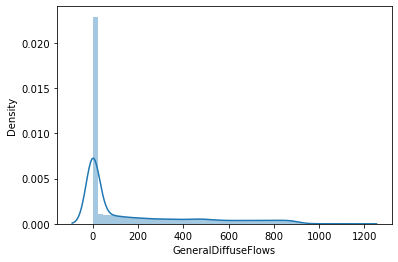

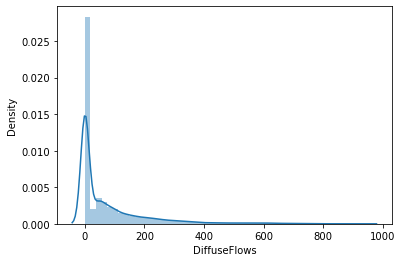

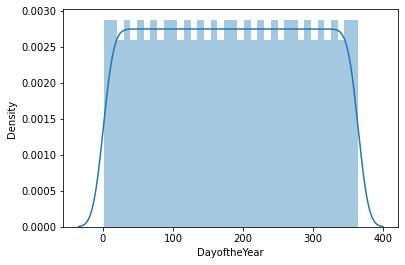

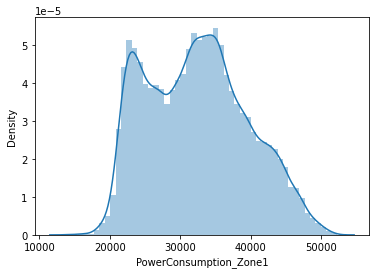

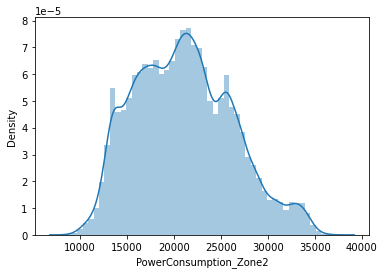

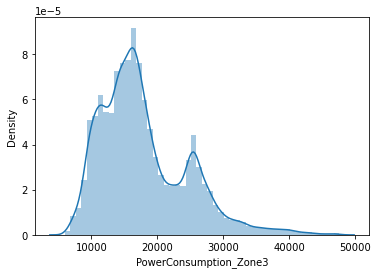

In [16]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='PowerConsumption_Zone1'>

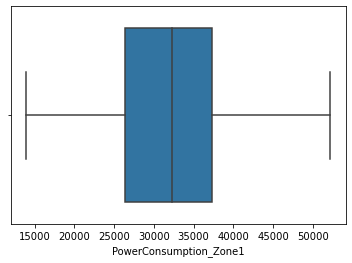

In [17]:
sns.boxplot(df['PowerConsumption_Zone1'])

<AxesSubplot:xlabel='PowerConsumption_Zone2'>

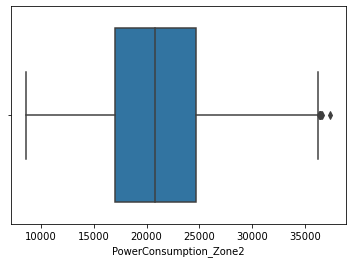

In [18]:
sns.boxplot(df['PowerConsumption_Zone2'])

<AxesSubplot:xlabel='PowerConsumption_Zone3'>

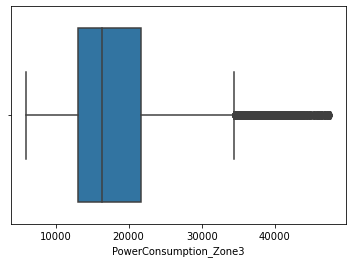

In [19]:
sns.boxplot(df['PowerConsumption_Zone3'])

## Outliers

In [20]:
df.shape

(52416, 9)

In [21]:
from scipy import stats

In [22]:
df=df[(np.abs(stats.zscore(df)<3)).all(axis=1)]

In [23]:
df.shape

(50287, 9)

## Split Data

In [24]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'DayoftheYear', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [25]:
X=df.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3'],axis=1)
y=df[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

In [26]:
X.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,DayoftheYear
0,6.559,73.8,0.083,0.051,0.119,1
1,6.414,74.5,0.083,0.070,0.085,1
2,6.313,74.5,0.080,0.062,0.100,1
3,6.121,75.0,0.083,0.091,0.096,1
4,5.921,75.7,0.081,0.048,0.085,1


In [27]:
y.head()

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,34055.69620,16128.87538,20240.96386
1,29814.68354,19375.07599,20131.08434
2,29128.10127,19006.68693,19668.43373
3,28228.86076,18361.09422,18899.27711
4,27335.69620,17872.34043,18442.40964


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## standardization

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
M1=LinearRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P1))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P1))
print('\n')
print('R2 score:',r2_score(y_test,P1))

mean_squared_error: 26872021.807955


mean_absolute_error: 4188.834026803885


R2 score: 0.29265608595443066


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [40]:
M2=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P2))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P2))
print('\n')
print('R2 score:',r2_score(y_test,P2))

mean_squared_error: 23757718.530461684


mean_absolute_error: 3821.759930093221


R2 score: 0.38033100700172157


In [41]:
M3=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P3))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P3))
print('\n')
print('R2 score:',r2_score(y_test,P3))

mean_squared_error: 22344331.113673117


mean_absolute_error: 3652.3349040723674


R2 score: 0.41770150935876255


## Ridge

In [42]:
from sklearn.linear_model import Ridge

In [43]:
M4=Ridge()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P4))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P4))
print('\n')
print('R2 score:',r2_score(y_test,P4))

mean_squared_error: 26872016.938999902


mean_absolute_error: 4188.831023797592


R2 score: 0.29265619109729274


In [45]:
M5=make_pipeline(PolynomialFeatures(degree=2),Ridge())
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P5))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P5))
print('\n')
print('R2 score:',r2_score(y_test,P5))

mean_squared_error: 23757782.873327654


mean_absolute_error: 3821.803496758044


R2 score: 0.38032890547934334


## Lasso

In [46]:
from sklearn.linear_model import Lasso

In [47]:
M6=Lasso()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P6))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P6))
print('\n')
print('R2 score:',r2_score(y_test,P6))

mean_squared_error: 26872154.4493905


mean_absolute_error: 4188.77905186013


R2 score: 0.2926522385519425


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
M7=RandomForestRegressor()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P7))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P7))
print('\n')
print('R2 score:',r2_score(y_test,P7))

mean_squared_error: 5396995.1055712355


mean_absolute_error: 1426.66607631449


R2 score: 0.8596421215928872


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
M8=DecisionTreeRegressor()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P8))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P8))
print('\n')
print('R2 score:',r2_score(y_test,P8))

mean_squared_error: 11236017.745801115


mean_absolute_error: 1650.1107157489998


R2 score: 0.7070749932306102


## KNN

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
M9=KNeighborsRegressor(n_neighbors=3)
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P9))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P9))
print('\n')
print('R2 score:',r2_score(y_test,P9))

mean_squared_error: 8948608.093802562


mean_absolute_error: 1690.3343637551482


R2 score: 0.7658152139668424


## Neural Network

In [61]:
from sklearn.neural_network import MLPRegressor

In [64]:
M10=MLPRegressor( hidden_layer_sizes=(1000,))
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P10))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P10))
print('\n')
print('R2 score:',r2_score(y_test,P10))

mean_squared_error: 24297207.324778993


mean_absolute_error: 3895.1421722634354


R2 score: 0.3668962140456215


## XG Boosting

In [69]:
from xgboost import XGBRFRegressor

In [70]:
M11=XGBRFRegressor()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,P11))
print('\n')
print('mean_absolute_error:', mean_absolute_error(y_test,P11))
print('\n')
print('R2 score:',r2_score(y_test,P11))

mean_squared_error: 19835476.54690564


mean_absolute_error: 3417.9521258243494


R2 score: 0.4811499999734568
